In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1.)

In [2]:
data_path = "resources/ml-100k/"
names = ["User", "Item", "Rating", "Timestamp"]

## Trainingsset

In [3]:
training = pd.read_csv(data_path + "ua.base", delim_whitespace=True, header=None, names=names)
training

,User,Item,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


## Testset

In [4]:
test = pd.read_csv(data_path + "ua.test", delim_whitespace=True, header=None, names=names)
test

,User,Item,Rating,Timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


# 2.)

## Items

In [5]:
genres = ["Action", "Adventure", "Animation", "Chidrens", "Comdey", "Crime", "Documentary", "Drama", "Fantasy", 
          "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]


item_names = ["ID", "Title", "Release date", "Video release date", "IMDb Url", "unknown"]
item_names.extend(genres)
items = pd.read_csv(data_path + "u.item", delimiter="|", header=None, encoding = "ISO-8859-1", names=item_names)
items = items.set_index("ID")
items

,Title,Release date,Video release date,IMDb Url,unknown,Action,Adventure,Animation,Chidrens,Comdey,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ID,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
merged = training.merge(items, left_on="Item", right_on="ID")
merged

,User,Item,Rating,Timestamp,Title,Release date,Video release date,IMDb Url,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,874965758,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,888550871,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,4,883599478,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,1,4,877888877,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,1,3,882140487,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90565,863,1679,3,889289491,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,...,0,0,0,0,0,1,0,1,0,0
90566,863,1680,2,889289570,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,...,0,0,0,0,0,1,0,0,0,0
90567,883,1656,5,891692168,Little City (1998),20-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Little+City+(...,0,0,...,0,0,0,0,0,1,0,0,0,0
90568,896,1681,3,887160722,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
movies = merged[["Item", "Title"]].drop_duplicates(subset=["Item"])

avg_rating = merged.groupby("Item")["Rating"].mean()
avg_rating

Item
1       3.859694
2       3.198347
3       3.058824
4       3.545455
5       3.291139
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: Rating, Length: 1680, dtype: float64

In [8]:
movies

,Item,Title
0,1,Toy Story (1995)
392,2,GoldenEye (1995)
513,3,Four Rooms (1995)
598,4,Get Shorty (1995)
796,5,Copycat (1995)
...,...,...
90565,1679,B. Monkey (1998)
90566,1680,Sliding Doors (1998)
90567,1656,Little City (1998)
90568,1681,You So Crazy (1994)


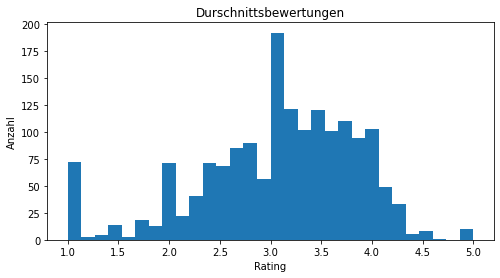

In [9]:
fig, ax = plt.subplots(figsize=[8,4])
ax.hist(avg_rating.values, bins=30)
ax.set_title("Durschnittsbewertungen")
ax.set_xlabel("Rating")
ax.set_ylabel("Anzahl")
plt.show()


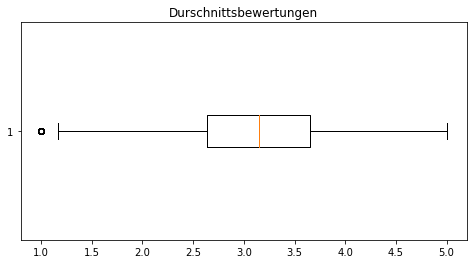

In [10]:
fig, ax = plt.subplots(figsize=[8,4])
ax.boxplot(avg_rating.values, vert=False)
ax.set_title("Durschnittsbewertungen")
plt.show()

In [11]:
genre_count = {genre: merged[merged[genre] == 1][genre].count() for genre in genres}
genre_count
pd_movies_by_genre = pd.DataFrame(genre_count.values(), genre_count.keys(), columns=["Count"])
pd_movies_by_genre

,Count
Action,23124
Adventure,12508
Animation,3328
Chidrens,6568
Comdey,27177
Crime,7259
Documentary,686
Drama,36011
Fantasy,1244
Film-Noir,1578


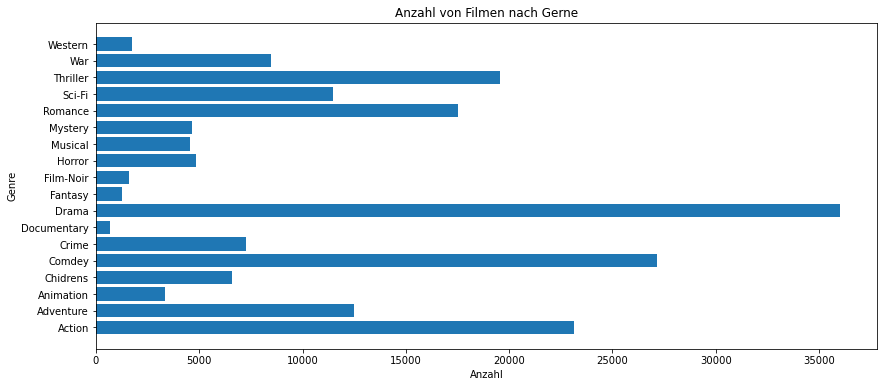

In [12]:
fig, ax = plt.subplots(figsize=[14,6])
ax.barh(list(genre_count.keys()), genre_count.values())
ax.set_title("Anzahl von Filmen nach Gerne")
ax.set_xlabel("Anzahl")
ax.set_ylabel("Genre")
plt.show()

# 3.)

In [13]:
matrix = merged.pivot(index="User", columns="Item", values="Rating")
matrix = matrix.fillna("NA")
matrix


Item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,4.0,NA,NA,NA,NA,NA,NA,NA,NA,2.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NA,NA,NA,NA,NA,NA,NA,NA,5.0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
940,NA,NA,NA,2.0,NA,NA,4.0,5.0,3.0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
941,5.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
mat_01 = matrix.applymap(lambda x: 0 if x == "NA" else 1)
mat_01


Item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.)

In [15]:
from scipy.linalg import svd

U, s, I = svd(mat_01, full_matrices=False)
s


array([1.62117801e+02, 5.90708096e+01, 5.30306561e+01, 3.89306436e+01,
       3.64328508e+01, 3.56324924e+01, 3.01746105e+01, 2.97184106e+01,
       2.54435304e+01, 2.48772002e+01, 2.32986203e+01, 2.28380737e+01,
       2.21399113e+01, 2.17846711e+01, 2.13910165e+01, 2.10591353e+01,
       2.01713611e+01, 1.99475620e+01, 1.95532765e+01, 1.92977831e+01,
       1.88791743e+01, 1.85438680e+01, 1.83564162e+01, 1.79950519e+01,
       1.79330079e+01, 1.77951407e+01, 1.77359997e+01, 1.73287103e+01,
       1.72958315e+01, 1.72350270e+01, 1.69462728e+01, 1.68463987e+01,
       1.68170100e+01, 1.67086987e+01, 1.66813879e+01, 1.64129952e+01,
       1.63062743e+01, 1.61905882e+01, 1.61368719e+01, 1.60418979e+01,
       1.60128568e+01, 1.59462731e+01, 1.58854837e+01, 1.58651878e+01,
       1.58151763e+01, 1.57017876e+01, 1.56632675e+01, 1.55730609e+01,
       1.54824971e+01, 1.53909601e+01, 1.53704393e+01, 1.52846265e+01,
       1.51636751e+01, 1.51258548e+01, 1.50832435e+01, 1.50529219e+01,
      

In [16]:
S = np.diag(s)
S

array([[1.62117801e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.90708096e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.30306561e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.24921568e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.08641915e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.01880325e-01]])

In [17]:
reconstruction = np.dot(U, np.dot(S, I))
reconstruction

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -2.04195927e-16,  6.22332047e-17, -1.11239143e-16],
       [ 1.00000000e+00,  3.61776581e-15,  7.19042881e-15, ...,
         9.26721807e-17, -2.63244287e-16, -2.01227923e-16],
       [-2.00013617e-15, -1.44849410e-15,  2.62029981e-15, ...,
         9.62771529e-17,  1.72171305e-16,  1.63270683e-16],
       ...,
       [ 1.00000000e+00, -1.02695630e-15, -2.77555756e-16, ...,
         8.06646416e-17,  7.11236625e-17, -7.84962373e-17],
       [-3.05875117e-15, -9.32413868e-16, -7.19910243e-16, ...,
        -3.46944695e-17, -8.04478012e-17,  2.12503626e-17],
       [-9.92608773e-15,  1.00000000e+00, -3.06005221e-15, ...,
        -1.12757026e-17, -8.43509290e-17, -8.57027936e-17]])

In [18]:
fair_U = U @ np.sqrt(S)
fair_I = np.sqrt(S) @ I

reconstruction2 = np.dot(fair_U, fair_I)
reconstruction2


array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -2.17958518e-16,  6.17995238e-17, -8.78203760e-17],
       [ 1.00000000e+00,  3.60388802e-15,  7.29711430e-15, ...,
         8.98803601e-17, -2.58040117e-16, -1.96457434e-16],
       [-2.05738204e-15, -1.43461631e-15,  2.61509564e-15, ...,
         1.04083409e-16,  1.70436582e-16,  1.73269060e-16],
       ...,
       [ 1.00000000e+00, -1.02782366e-15, -2.63677968e-16, ...,
         7.45931095e-17,  7.19910243e-17, -7.54604712e-17],
       [-3.04660810e-15, -9.13765591e-16, -7.45063733e-16, ...,
        -5.03069808e-17, -7.80625564e-17,  2.12503626e-17],
       [-1.01503007e-14,  1.00000000e+00, -2.96550978e-15, ...,
        -1.95156391e-17, -1.04950770e-16, -9.78899036e-17]])

## Faire Verteilung auf die anderen Matrizen:
$$
U = U * \sqrt{s} \\
I = \sqrt{s} * I
$$

# 5.)

In [19]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [20]:
from scipy.sparse.linalg import svds

p_values = [p for p in range(1, 501 + 1, 10)]
errors = []

for p in p_values:
    u_trunc, s_trunc, i_trunc = svds(np.array(mat_01).astype(float), k=p)
    s_trunc = np.diag(s_trunc)
    product = np.dot(u_trunc, np.dot(s_trunc, i_trunc))
    error = rmse(product, mat_01).mean()
    errors.append(error)
    print("Error for p = {0}: {1}".format(p, error))




Error for p = 1: 0.17140009177011525
Error for p = 11: 0.15401792950388823
Error for p = 21: 0.14714067326003716
Error for p = 31: 0.1423390518893129
Error for p = 41: 0.1381494253188032
Error for p = 51: 0.13428065967603336
Error for p = 61: 0.13051871014362484
Error for p = 71: 0.126830479154752
Error for p = 81: 0.12332031973247445
Error for p = 91: 0.1199094724523755
Error for p = 101: 0.11658523515970473
Error for p = 111: 0.1133595090709575
Error for p = 121: 0.11025194906040299
Error for p = 131: 0.10719212796539782
Error for p = 141: 0.10420999362498051
Error for p = 151: 0.10132682082467905
Error for p = 161: 0.09851124751028537
Error for p = 171: 0.09571482233488458
Error for p = 181: 0.09298346851855895
Error for p = 191: 0.090344082508779
Error for p = 201: 0.08774531926676286
Error for p = 211: 0.08522802610393475
Error for p = 221: 0.08273988849745186
Error for p = 231: 0.08032579891887122
Error for p = 241: 0.07797112418774813
Error for p = 251: 0.07565957707927456
Error

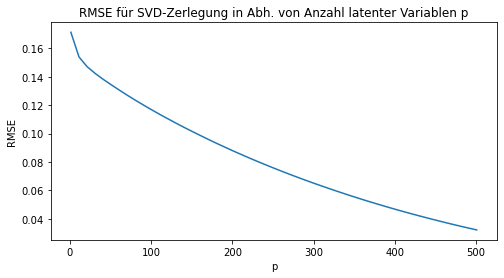

In [21]:
fig, ax = plt.subplots(figsize=[8,4])
ax.plot(p_values, errors)
ax.set_title("RMSE für SVD-Zerlegung in Abh. von Anzahl latenter Variablen p")
ax.set_xlabel("p")
ax.set_ylabel("RMSE")
plt.show()